## Section 2. Numpy
### Lists vs. arrays

In [2]:
import numpy as np

In [20]:
#Python list
L = [1,2,3]
#Numpy array
A = np.array([1,2,3])

for e in L:
    print e

1
2
3


In [8]:
for e in A:
    print e

1
2
3


In [21]:
#append to list
L.append(4)
L

[1, 2, 3, 4]

In [18]:
#Numpy array has no append method
A.append(4)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [22]:
L = L + [5]
L

[1, 2, 3, 4, 5]

In [23]:
#Numpy array also doesn't allow adding
A = A + [4,5]

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [25]:
#To do element-wise addition in a list requires a loop
L2 = []
for e in L:
    L2.append(e + e)
L2

[2, 4, 6, 8, 10]

In [27]:
#Numpy does element-wise addition by default
A + A

array([2, 4, 6])

In [ ]:
#I guess the point is that Numpy arrays are immutable, like Java?

In [28]:
#Scalar-vector multiplication
2*A

array([2, 4, 6])

In [29]:
#Same operation with a list repeats the elements of the list
2*L

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [30]:
#Can't use exonent on list
L**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [32]:
#You can with np array
A**2

array([1, 4, 9])

In [37]:
#Square root, log
np.sqrt(A)
np.log(A)
#note that np does not do logs of any arbitrary base; use math.log for that
#exponential
np.exp(A)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [46]:
#just for fun...math.log takes only a single float, not a list or array...must loop(?)
import math
math.log(3.0, 3)

1.0

### Dot product 1: For loop vs. cosine method vs. dot function

$$a \cdot b = a^{T}b = \sum_{d=1}^{D} a_{d}b_{d}$$
$$ a \cdot b = |a||b|\cos\theta_{ab}$$

In [62]:
a = np.array([1,2])
b = np.array([2,1])
#for loop
dot = 0
for e, f in zip(a, b):
    dot += e*f
print(dot)

4
4
4
4
4
4


In [ ]:
#can sum up the element-wise products
print(np.sum(a*b))
#equivalent:
print((a*b).sum())
#so sum is an instance method of numpy, though the first version looks static


In [ ]:
#the preferred way to get a dot product
print(np.dot(a, b))
#equivalent:
print(a.dot(b))
print(b.dot(a))

In [69]:
#cosine method
#magnitude of array is square root of sum of squares
a_mag = np.sqrt((a*a).sum())
print(a_mag)
b_mag = np.sqrt((b*b).sum())
print(b_mag)
#numpy has a method for magnitude
a_mag = np.linalg.norm(a)
print(a_mag)
b_mag = np.linalg.norm(b)
print(b_mag)

cosangle = a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))
cosangle
angle = np.arccos(cosangle)
angle

#The course here doesn't describe how to use cosine method to get dot product; 
#the point (I guess) is to show that you need to know the cos and norms ahead of time to get dot product

2.23606797749979
2.23606797749979
2.23606797749979
2.23606797749979


0.6435011087932847

### Dot product 2: speed comparison
Following is from course's dot_for.py.

np.random.randn returns values from standard normal distribution.

xrange returns a "generator object" for use in for loops; smaller memory use than range.

The code builds a dot product on two vectors with 100 values 100,000 times, first in a loop and second using the numpy dot function, and shows how many times the first method takes than the second (about 30).

In [71]:
import numpy as np
from datetime import datetime

a = np.random.randn(100)
b = np.random.randn(100)
T = 100000

def slow_dot_product(a, b):
  result = 0
  for e, f in zip(a, b):
    result += e*f
  return result

t0 = datetime.now()
for t in xrange(T):
  slow_dot_product(a, b)
dt1 = datetime.now() - t0

t0 = datetime.now()
for t in xrange(T):
  a.dot(b)
dt2 = datetime.now() - t0

print "dt1 / dt2:", dt1.total_seconds() / dt2.total_seconds()

dt1 / dt2: 32.7425422197


### Vectors and matrices

In [81]:
#Create matrix with two lists
M = np.array( [ [1,2], [3,4] ] )

#Can create list of lists rather than matrix...
L=[ [1,2], [3,4] ]
#Getting first element of first row in L
print(L[0][0])
#This also works with the matrix
print(M[0][0])
#But preferred/expected/shorthand method is two indices in one set of brackets
print(M[0,0])

1
1
1


In [86]:
#There is also an object explicitly called matrix (rather than array in example above)
M2 = np.matrix(L)
print(M2)
#The official documentation recommends against using matrix object, prefers use of array
#There are differences between array and matrix but he doesn't elaborate
#To convert matrix to array
A = np.array(M2)
print(A)

#array still has convenient matrix operations like transpose
print(A.T)
#note above: T is a property, not a method; is it calculated on the fly?

[[1 2]
 [3 4]]
[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


### Generating matrices to work with

In [14]:
#Generate zeros
Z = np.zeros(10)
print(Z)
#Generate array with zeros (note argument is a tuple of each dimension)
Z = np.zeros((10, 10))
print(Z)
#Also method to generate ones
Z = np.ones((10, 10))

#np.random.random() generates continuous uniform values between [0, 1)
Z = np.random.random((10, 10))

#Values from standard normmal distribution
#Note that this method takes dimensions as individual arguments
G = np.random.randn(10, 10)

#Array gives us statistics
print("mean: " + str(G.mean()))
print("var: " + str(G.var()))
print("sd: " + str(G.std()))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
mean: -0.0005742507570779854
var: 0.9821508206521989
sd: 0.9910352267463548


### Matrix products
Definition of matrix multiplication:
$$C(i,j) = \sum_{i=1}^{K} A(i,k) B(k, j)$$

This means inner dimensions must match.

This section is weak; he talks about matrix multiplication, shows no examples, and then talks about element-wise multiplication. So I will make up my own.

In [22]:
A = np.array( [ [1,2, 3], [4, 5, 6] ] )
B = np.array( [ [1,2], [3,4], [5,6] ] )
print("Matrix A")
print(A)
print("Matrix B")
print(B)
#To do matrix multiplication, use dot method:
print("A multiplied with B")
print(A.dot(B))

#I have seen other methods; I bet the matrix object has ways of doing it, and the numpy.linalg also.
#But not sure which is "favored" or warned against. Python seems to have functionality that you're waved away from.

Matrix A
[[1 2 3]
 [4 5 6]]
Matrix B
[[1 2]
 [3 4]
 [5 6]]
A multiplied with B
[[22 28]
 [49 64]]


### More matrix operations

In [24]:
#Inverse--in the linalg library
A = np.array([[1,2], [3,4]])
A_inv = np.linalg.inv(A)
print(A_inv)
#Confirm by seeing that inverse * matrix gives identity matrix
print(A_inv.dot(A))

[[-2.   1. ]
 [ 1.5 -0.5]]


[[1.00000000e+00 0.00000000e+00]
 [2.22044605e-16 1.00000000e+00]]


In [26]:
#Determinant
A_det = np.linalg.det(A)
print(A_det)

-2.0000000000000004


In [29]:
#Diagonal (for whatever reason, this is in main np library)
print(np.diag(A))
#Same method can also create array with supplied values as the diagonal
print(np.diag([1,2]))

[1 4]
[[1 0]
 [0 2]]


In [ ]:
#Outer product. Something I haven't gotten to in linear algebra yet.

$$\sum = E\{(x-\mu) (x-\mu)^{T})\} \approx \frac{1}{N-1} \sum_{n=1}{N} (x_n -\bar{x})(x_n - \bar{x})^{T}$$

In [32]:
a = np.array([1,2])
b = np.array([3,4])
np.outer(a, b)

array([[3, 4],
       [6, 8]])

In [34]:
#Matrix trace: the sum of the diagonals of a matrix
print(np.diag(A).sum())
#or
print(np.trace(A))

5
5


In [37]:
#Eigenvalue
X = np.random.randn(100,3)
cov = np.cov(X)
print(cov.shape)
#the shape should be 3x3, we want the covariance between the features (columns)
cov = np.cov(X.T)
print(cov.shape)
#lesson: transpose matrix before taking covariance


(100, 100)
(3, 3)


In [ ]:
#skipping the rest of this; it is out of my depth in linear algebra. Need to take a course.

### Solving a linear system
Problem:
$$Ax = b$$
Solution:
$$A^{-1}Ax = x = A^{-1}b$$
The above assumes that A is invertible (and therefore square).

In [45]:
A = np.array([[1,2], [3,4]])
b = np.array([1,2])
print(A)
print(b)
x = np.linalg.inv(A).dot(b)
print(x)
print(A.dot(x))

#linalg has this in a single method
x = np.linalg.solve(A, b)
print(x)

#He makes a remark about MATLAB, and then says "you should always use solve, never use inv--solve is faster
#and more accurate." Did he mean in Python, or MATLAB, or both?

[[1 2]
 [3 4]]
[1 2]
[0.  0.5]
[1. 2.]
[0.  0.5]


### Word problem
The admission fee at a small fair is \$1.50 for children and \$4.00 for adults. (What is this, 1958?) On a certain day, 220 people enter the fair and \$5050 is collected. How many children and how many adults attended? Let:

$X1 = $ number of children, $X2 = $ number of adults  
$X1 + X2 = 2200$  
$1.5X1 + 4X2 = 5050$

In [53]:
A = np.array( [ [1, 1], [1.5, 4] ] )
b = np.array([2200, 5050])
x = np.linalg.solve(A, b)
print(A)
print(b)
print("Solution:")
print(x)
print("Ax:")
print(A.dot(x))

[[1.  1. ]
 [1.5 4. ]]
[2200 5050]
Solution:
[1500.  700.]
Ax:
[2200. 5050.]


## Pandas
### Manual data loading

In [61]:
import os
os.listdir("../machine_learning_examples/linear_regression_class")

['mlr02.xls',
 'generate_poly.py',
 'lr_poly.py',
 'generate_1d.py',
 'gradient_descent.py',
 'overfitting.py',
 'data_2d.csv',
 'moore.csv',
 'generate_2d.py',
 'systolic.py',
 'moore.py',
 'data_poly.csv',
 'l1_regularization.py',
 'lr_1d.py',
 'lr_2d.py',
 'data_1d.csv',
 'l2_regularization.py']

In [68]:
#the manual way to load data; useful if data is unstructured or needs pre-processing before being put into
#matrix
X = []
for line in open("../machine_learning_examples/linear_regression_class/data_2d.csv"):
    row = line.split(",")
    sample = map(float, row)
    X.append(sample)
X[0:5]

[[17.9302012052, 94.5205919533, 320.259529602],
 [97.1446971852, 69.5932819844, 404.634471526],
 [81.7759007845, 5.73764809688, 181.485107741],
 [55.8543424175, 70.3259016768, 321.773638018],
 [49.3665499855, 75.1140401571, 322.465485583]]

In [66]:
X = np.array(X)
X.shape

(100, 3)

### DataFrames

In [81]:
import pandas as pd
#change to the data path just for fun
os.chdir("/Users/dnuttle/Documents/python/DeepLearningPrerequisites/machine_learning_examples/linear_regression_class")
X = pd.read_csv("data_2d.csv", header=None)
print(type(X))
print(X.head(5))

<class 'pandas.core.frame.DataFrame'>
           0          1           2
0  17.930201  94.520592  320.259530
1  97.144697  69.593282  404.634472
2  81.775901   5.737648  181.485108
3  55.854342  70.325902  321.773638
4  49.366550  75.114040  322.465486


In [80]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
0    100 non-null float64
1    100 non-null float64
2    100 non-null float64
dtypes: float64(3)
memory usage: 2.4 KB


### More about dataframes: selecting rows and columns

In [87]:
#It is always possible to convert DataFrame to an array (in spite of the name "as_matrix", it's an array)
X2 = X.as_matrix()
#This allows for accessing by indices, which doesn't work for DataFrame:
print(X2[0,0])


17.9302012052


KeyError: (0, 0)

In [89]:
#One index in a DataFrame does work (it returns a Pandas Series:
type(X[0])
#but what is returned is the column in the DataFrame that has the name 0...not necessarily the first column
#A Series is a Pandas 1-dimensional list, like a vector

pandas.core.series.Series

In [90]:
#To get a row in a DataFrame:
X.iloc[0] # returns the 0th row
X.ix[0] #also returns 0th row
#What course doesn't mention:
#Note that ix is deprecated, and acts like loc (using labels), falls back to position-based indexing
#Use iloc

0     17.930201
1     94.520592
2    320.259530
Name: 0, dtype: float64

In [92]:
#To select 2 columns, use list of indices as argument:
X[[0,2]].head()

,0,2
0,17.930201,320.259530
1,97.144697,404.634472
2,81.775901,181.485108
3,55.854342,321.773638
4,49.366550,322.465486


In [93]:
#Brackets can be used with booleans to filter by row
#To return all rows where the first column's value is < 5
X[ X[0] < 5]

,0,1,2
5,3.192702,29.256299,94.618811
44,3.593966,96.252217,293.237183
54,4.593463,46.335932,145.818745
90,1.382983,84.944087,252.905653
99,4.142669,52.254726,168.034401


### Even more about DataFrames: column names

In [99]:
os.chdir("/Users/dnuttle/Documents/python/DeepLearningPrerequisites/machine_learning_examples/airline")
#The file has three extraneous lines at end that should be skipped
#This file has a header so there is no header=None argument)
#skipfooter does not work with the "default engine" whatever that is, hence engine="python"
X = pd.read_csv("international-airline-passengers.csv", engine="python", skipfooter=3)
X.info()
X.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                                                                             144 non-null object
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [102]:
#column names are ugly
print(X.columns)
#now rename them
X.columns =["month", "passengers"]
print(X.columns)

Index([u'Month', u'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'], dtype='object')
Index([u'month', u'passengers'], dtype='object')


In [105]:
#Now select by name
X['passengers'].head()

0    112
1    118
2    132
3    129
4    121
Name: passengers, dtype: int64

In [106]:
#Or:
X.passengers.head()
#The above method won't work if column name contains whitespace

0    112
1    118
2    132
3    129
4    121
Name: passengers, dtype: int64

In [108]:
#Adding a column; for example, a column of bias values of 1
X['ones'] = 1
X.head()

,month,passengers,ones
0,1949-01,112,1
1,1949-02,118,1
2,1949-03,132,1
3,1949-04,129,1
4,1949-05,121,1


### The apply() function

In [ ]:
#apply function can be useful if we want to add a new column to a df with a new value derived from the row
#example, x1*x2
#df['x1x2'] = df.apply(lambda row: row['x1'] * row['x2'], axis=1)
#axis=1 means apply across row instead of column


In [109]:
#convert first row of airline data into date and store it
from datetime import datetime
#strptime can parse out datetime values, e.g.
datetime.strptime("1949-05", "%Y-%m")

datetime.datetime(1949, 5, 1, 0, 0)

In [110]:
X['dt'] = X.apply(lambda row: datetime.strptime(row['month'], "%Y-%m"), axis=1)
X.head()

,month,passengers,ones,dt
0,1949-01,112,1,1949-01-01
1,1949-02,118,1,1949-02-01
2,1949-03,132,1,1949-03-01
3,1949-04,129,1,1949-04-01
4,1949-05,121,1,1949-05-01


### Joins

In [113]:
os.chdir("/Users/dnuttle/Documents/python/DeepLearningPrerequisites/machine_learning_examples/numpy_class")
t1 = pd.read_csv("table1.csv")
t2 = pd.read_csv("table2.csv")
print(t1)
print(t2)

   user_id            email  age
0        1  alice@gmail.com   20
1        2    bob@gmail.com   25
2        3  carol@gmail.com   30
    user_id  ad_id  click
0         1      1      1
1         1      2      0
2         1      5      0
3         2      3      0
4         2      4      1
5         2      1      0
6         3      2      0
7         3      1      0
8         3      3      0
9         3      4      0
10        3      5      1


In [115]:
#if no value provided for on, uses the row index
m = pd.merge(t1, t2, on="user_id")
print(m)
#alternative
m = t1.merge(t2, on="user_id")

    user_id            email  age  ad_id  click
0         1  alice@gmail.com   20      1      1
1         1  alice@gmail.com   20      2      0
2         1  alice@gmail.com   20      5      0
3         2    bob@gmail.com   25      3      0
4         2    bob@gmail.com   25      4      1
5         2    bob@gmail.com   25      1      0
6         3  carol@gmail.com   30      2      0
7         3  carol@gmail.com   30      1      0
8         3  carol@gmail.com   30      3      0
9         3  carol@gmail.com   30      4      0
10        3  carol@gmail.com   30      5      1


## Section 3: Matplotlib
### Line chart

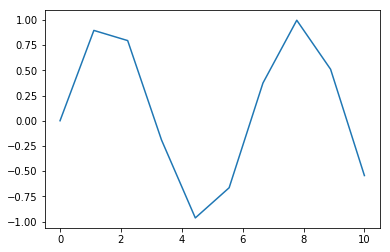

In [117]:
import matplotlib.pyplot as plt
#linspace generates values in a range
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.plot(x, y)

Text(0.5,1,u'Chart Title')

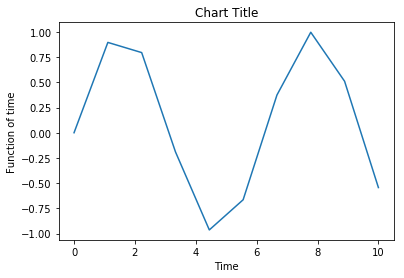

In [118]:
plt.plot(x,y)
plt.xlabel("Time")
plt.ylabel("Function of time")
plt.title("Chart Title")

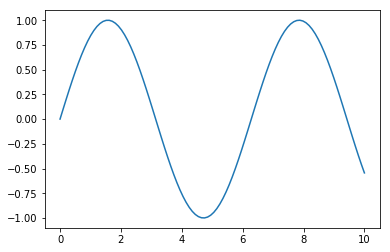

In [119]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)

### Scatterplot

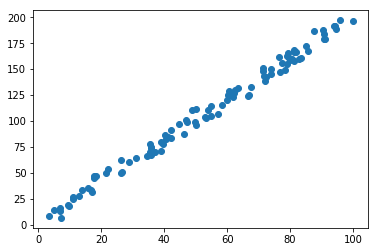

In [126]:
os.chdir("/Users/dnuttle/Documents/python/DeepLearningPrerequisites/machine_learning_examples/linear_regression_class")
A = pd.read_csv("data_1d.csv", header=None).as_matrix()
x = A[:,0]
y = A[:,1]
plt.scatter(x, y)


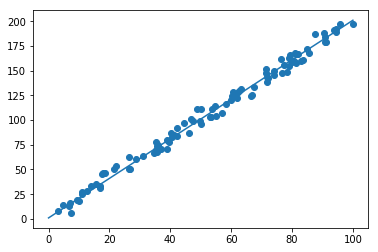

In [130]:
x_line = np.linspace(0,100,100)
y_line = 2 * x_line + 1
plt.scatter(x, y)
plt.plot(x_line, y_line)

### Histogram

(array([10.,  9.,  5., 13., 10., 10.,  8., 16., 10.,  9.]),
 array([ 3.21124861, 12.88597188, 22.56069515, 32.23541842, 41.91014169,
        51.58486496, 61.25958823, 70.9343115 , 80.60903477, 90.28375804,
        99.95848131]),
 <a list of 10 Patch objects>)

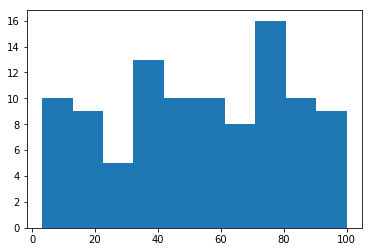

In [131]:
plt.hist(x)

(array([1.000e+00, 7.000e+00, 3.300e+01, 7.900e+01, 1.740e+02, 4.020e+02,
        6.290e+02, 1.000e+03, 1.259e+03, 1.475e+03, 1.455e+03, 1.273e+03,
        9.480e+02, 6.000e+02, 3.560e+02, 1.720e+02, 8.300e+01, 3.100e+01,
        2.000e+01, 3.000e+00]),
 array([-3.72279504, -3.34984055, -2.97688606, -2.60393157, -2.23097708,
        -1.85802259, -1.4850681 , -1.11211361, -0.73915912, -0.36620463,
         0.00674986,  0.37970435,  0.75265884,  1.12561332,  1.49856781,
         1.8715223 ,  2.24447679,  2.61743128,  2.99038577,  3.36334026,
         3.73629475]),
 <a list of 20 Patch objects>)

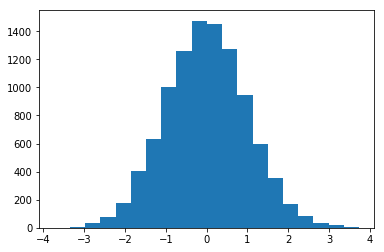

In [135]:
N = np.random.randn(10000)
plt.hist(N, bins= 20)

(array([ 6.,  7., 15., 14., 12., 18., 13.,  7.,  6.,  2.]),
 array([-9.78834827, -7.57337797, -5.35840768, -3.14343738, -0.92846708,
         1.28650321,  3.50147351,  5.7164438 ,  7.9314141 , 10.14638439,
        12.36135469]),
 <a list of 10 Patch objects>)

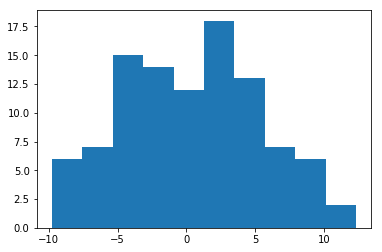

In [138]:
#residuals should be normally distributed
y_actual = 2 * x + 1 #misnomer if you ask me, this is y_predicted; y is "y actual" or observed
residuals = y - y_actual
plt.hist(residuals)

### Plotting images

In [142]:
os.chdir("/Users/dnuttle/Documents/python/kaggle/digit-recognizer")
df = pd.read_csv("train.csv")
df.shape

(42000, 785)

In [144]:
M = df.as_matrix()
im = M[0, 1:]
im.shape

(784,)

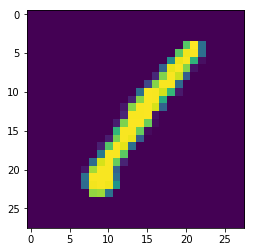

In [146]:
im = im.reshape(28,28)
im.shape
plt.imshow(im)

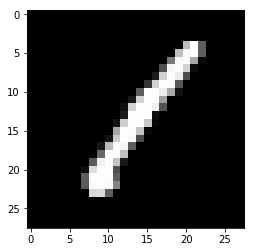

In [148]:
#show as grayscale
plt.imshow(im, cmap="gray")

(-0.5, 27.5, 27.5, -0.5)

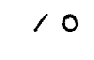

In [174]:
#show as black on white background
plt.rcParams['figure.figsize'] = [1,1]
fig, axs = plt.subplots(1,2)
plt.subplot(1,2,1)
plt.imshow(255 - im, cmap="gray")
plt.axis('off')
plt.subplot(1,2,2)
im2 = M[1,1:].reshape(28,28)
plt.imshow(255 - im2, cmap="gray")
plt.axis('off')


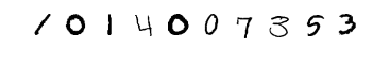

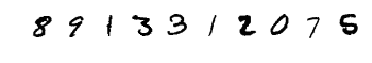

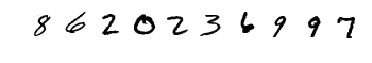

In [192]:
plt.rcParams['figure.figsize'] = [6,2]
for i in xrange(0,3):
    plt.show()
    for j in xrange(0,10):
        plt.subplot(i+1,10,j+1)
        plt.imshow(255 - M[i*10+j,1:].reshape(28,28), cmap="gray")
        plt.axis('off')

## Section 4: Scipy
### Guassian PDF and CDF

In [151]:
from scipy.stats import norm
#prob density of 0 in standard normal distribution
norm.pdf(0)

0.3989422804014327

In [152]:
#mean other than zero, var other than 1 (he means sd other than 1)
#loc is the mean, scale is the std dev
norm.pdf(0, loc=5, scale=10)

0.03520653267642995

In [153]:
#calculate density for several values
r = np.random.randn(10)
norm.pdf(r)

array([0.39385632, 0.09842615, 0.37256975, 0.31669684, 0.37710222,
       0.12432399, 0.38636397, 0.33025969, 0.36667772, 0.26550401])

In [195]:
#log of the probability density function
norm.logpdf(r)
#norm.logpdf() is same as math.log(norm.pdf())

array([-0.93176912, -2.31844879, -0.98733102, -1.14981029, -0.975239  ,
       -2.08486429, -0.95097542, -1.10787598, -1.00327197, -1.32612535])

In [207]:
#Lesson: log(x) + log(y) = x * y, and is faster
print(math.exp(norm.logpdf(10) + norm.logpdf(20)))
print(norm.pdf(10) * norm.pdf(20))
#another example:
print(10 * 6)
print(math.exp(math.log(10) + math.log(6)))

4.24814816856e-110
4.2481481685591575e-110
60
60.0


In [208]:
#cumulative probability function...he says that the integral is not solvable
norm.cdf(r)

array([0.4363653 , 0.95283904, 0.64425083, 0.24840513, 0.36860111,
       0.06337552, 0.59991534, 0.73062862, 0.34064966, 0.18341517])

In [209]:
#and again the log
norm.logcdf(r)

array([-0.82927555, -0.04830928, -0.43966714, -1.39269426, -0.99804022,
       -2.75867764, -0.51096673, -0.31384999, -1.07690071, -1.69600302])

### Sampling from a Guassian distribution (1-D)

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   3.,   1.,   3.,   2.,
          4.,   3.,   5.,   6.,   8.,   7.,  10.,  20.,  19.,  18.,  31.,
         26.,  36.,  43.,  58.,  73.,  66.,  89., 106.,  97., 128., 124.,
        146., 136., 160., 194., 206., 201., 226., 275., 262., 296., 320.,
        268., 306., 317., 315., 310., 308., 338., 315., 288., 262., 311.,
        311., 291., 242., 238., 214., 216., 194., 174., 160., 133., 125.,
        134., 121., 111.,  85.,  74.,  58.,  58.,  64.,  42.,  43.,  26.,
         27.,  17.,  13.,  18.,  16.,  10.,   4.,   7.,   7.,   2.,   9.,
          0.,   1.,   2.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,
          1.]),
 array([-3.88722625, -3.8084264 , -3.72962654, -3.65082668, -3.57202682,
        -3.49322696, -3.41442711, -3.33562725, -3.25682739, -3.17802753,
        -3.09922768, -3.02042782, -2.94162796, -2.8628281 , -2.78402825,
        -2.70522839, -2.62642853, -2.54762867, -2.46882882, -2.39002896,
        -2.3112291 , -2.23

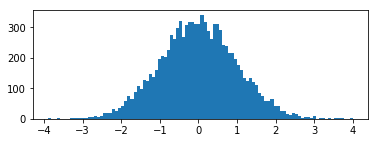

In [211]:
r = np.random.randn(10000)
plt.hist(r, bins=100)

(array([  3.,   0.,   1.,   1.,   0.,   5.,   3.,   7.,   6.,   4.,   6.,
          9.,  11.,  11.,  13.,  25.,  22.,  23.,  31.,  28.,  54.,  44.,
         62.,  69.,  84.,  81.,  96.,  98.,  94., 132., 113., 163., 137.,
        147., 189., 187., 219., 216., 231., 215., 239., 272., 266., 270.,
        255., 310., 296., 309., 291., 298., 267., 281., 271., 259., 269.,
        257., 237., 220., 205., 203., 194., 191., 164., 176., 145., 129.,
        112.,  95.,  81.,  88.,  69.,  56.,  58.,  48.,  56.,  27.,  39.,
         26.,  23.,  17.,  25.,  10.,  13.,   7.,   4.,   5.,   4.,   9.,
          5.,   1.,   1.,   1.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          2.]), array([-29.41895333, -28.69885498, -27.97875663, -27.25865828,
        -26.53855993, -25.81846158, -25.09836323, -24.37826488,
        -23.65816653, -22.93806818, -22.21796983, -21.49787148,
        -20.77777313, -20.05767478, -19.33757643, -18.61747808,
        -17.89737973, -17.17728138, -16.45718303, -15.73708468,

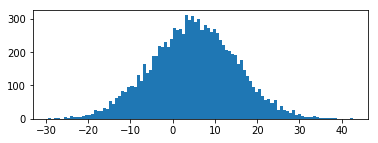

In [213]:
#To use custom mean and sd, scale
#so let sd=10 and mean=5
r = 10 * np.random.randn(10000) + 5
plt.hist(r, bins=100)

   ### Sampling from a Gaussian disribution (spherical and axis-aligned elliptical)

[[-1.2220012   0.84223469]
 [-0.42440082 -0.47985252]
 [-0.04777481  0.36575275]]


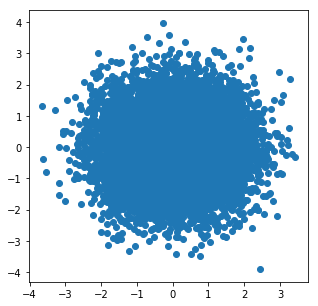

In [251]:
#Multidimensional Gaussia
#For example, 2D Guassian with mean=0 and sd=1 is known as "spherical"
#because each dimension is uncorrelated and independent of the other
r = np.random.randn(10000, 2)
print(r[0:3])
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(r[:,0], r[:,1])

(-25, 25)

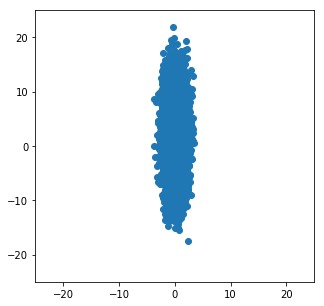

In [256]:
#elliptical gaussian: different variance for each dimension
r2 = r.copy()
r2[:,1] = 5 * r[:,1] + 2
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(r2[:,0], r2[:,1])
plt.xlim(-25, 25)
plt.ylim(-25, 25)
#calling plt.axis('equal') will scale the axes to be equal

### Sampling from a general multivariate normal
A general multivariate normal distribution: where the dimensions are not necessarily independent from one another. I think this just means two variables that are correlated, and both are normally distributed.

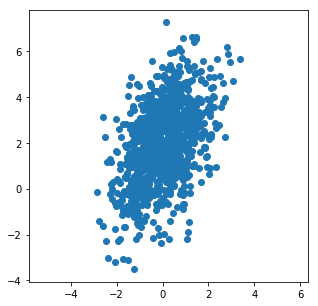

In [264]:
from scipy.stats import multivariate_normal as mvn
#define a covariance matrix
#variance of 1 in the first dimension, variance of 3 in the second,
#and covariance betweeen them is 0.8
cov = np.array([[1, 0.8], [0.8, 3]])
#means are 0 and 2
mu = np.array([0,2])
#generate random values
r = mvn.rvs(mean=mu, cov=cov, size=1000)
plt.axis('equal')
plt.scatter(r[:,0], r[:,1])
#note that there is another method in numpy for this:
#np.random.multivariate_normal(mean, cov, size)

### Other interesting Scipy functions

Just a quick tour of other interesting methods; no examples.
#### scipy.io.loadmat 
Loads a MATLAB file (cool!)
#### scipy.io.wavfile.read
Loads a wav file as data. This could be an interesting area to explore.
#### scipy.signal
Has methods for signal convolution.
#### Fast Fourier transform
Another area to learn about; point is that this, oddly, is in Numpy, not Scipy.

## Section 6. Exercises
### Ex. 1
Multiply v and A 25 times. Store the magnitude of the difference of v and v prime and then plot them magnitudes.

The point behind this problem has to do with eigenvalues; review later.

[8.16496581e-02 3.74165739e-02 4.89897949e-03 2.24499443e-03
 2.93938769e-04 1.34699666e-04 1.76363261e-05 8.08197996e-06
 1.05817957e-06 4.84918797e-07 6.34907742e-08 2.90951278e-08
 3.80944644e-09 1.74570763e-09 2.28566780e-10 1.04742444e-10
 1.37140199e-11 6.28459498e-12 8.22937285e-13 3.77115757e-13
 4.93585604e-14 2.26546034e-14 3.01451619e-15 1.36539378e-15
 1.35973996e-16]


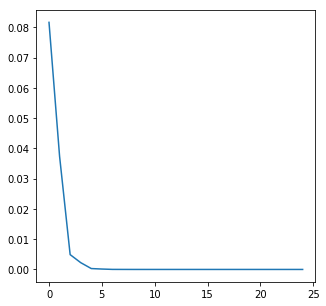

In [350]:
A = np.array([[0.3, 0.6, 0.1],
     [0.5, 0.2, 0.3],
     [0.4, 0.1, 0.5]])
v = np.array([1/3.0, 1/3.0, 1/3.0])

pts = np.array([0.0] * 25)
for i in xrange(0,25):
    vprime = v.dot(A)
    #print(vprime)
    #print(v)
    #print(np.linalg.norm(vprime - v))
    pts[i] = np.linalg.norm(vprime - v)
    #print("=============")
    v = vprime
plt.plot(xrange(0, 25), pts)

In [323]:

0.3*0.3 + 0.3*0.6 + 0.3*0.1
0.3*0.3 + 0.3*0.5 + 0.3*0.4
v.dot(A[2])

X = np.array([[1,2,3],[3,4,5]])
z = np.array([1,2])
print(z)
print(X)
z.dot(X)

[1 2]
[[1 2 3]
 [3 4 5]]


array([ 7, 10, 13])

### Ex. 2. Demonstrate Central Limit Theorem
If $Y = X_1 + X_2 + X_3 + \dots + X_n$, where X are IID, then as n approaches infinity, Y approaches a Gaussian distribution.

I can't follow the phrase--what a shock--but this seems to be saying that, as sample size grows, the sampling distribution becomes closer to normal, regardless of the population's distribution.

(array([  3.,   3.,   5.,  14.,  19.,  34.,  47.,  72.,  94., 114., 119.,
        113., 105.,  91.,  52.,  52.,  25.,  14.,  18.,   6.]),
 array([0.47073724, 0.47342867, 0.47612011, 0.47881155, 0.48150298,
        0.48419442, 0.48688586, 0.48957729, 0.49226873, 0.49496017,
        0.4976516 , 0.50034304, 0.50303448, 0.50572591, 0.50841735,
        0.51110879, 0.51380022, 0.51649166, 0.5191831 , 0.52187453,
        0.52456597]),
 <a list of 20 Patch objects>)

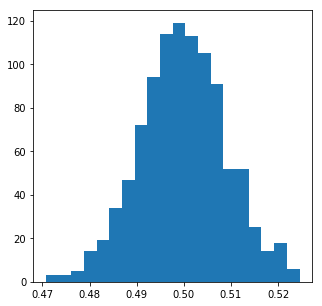

In [360]:
from scipy.stats import uniform
Y = np.array([0.0]*1000)
for i in xrange(0, 1000):
    samp = uniform.rvs(size=1000)
    Y[i] = np.mean(samp)
plt.hist(Y, bins=20)
#Expected mean is 0.5
#Expected variance: 

### Ex. 3. Mean image for classes in MNIST
Calculate the matrix of average values for each of the ten digit classes.

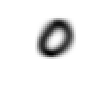

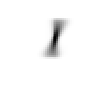

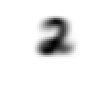

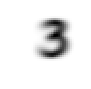

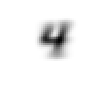

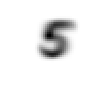

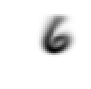

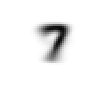

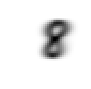

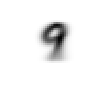

In [387]:
imgs = np.array([[0.0] * 28 * 28] * 10)
for i in xrange(0,10):
    for j in xrange(0,28*28):
        m = np.mean(M[M[:,0]==i, j+1])
        imgs[i, j] = m
for i in xrange(0, 10):
    plt.rcParams['figure.figsize'] = [1,1]
    plt.imshow(255-imgs[i].reshape(28,28), cmap="gray")
    plt.axis('off')
    plt.show()

### Ex. 4. Flip image 90 degrees

2018-07-05 15:01:53.391640
Took avg of 0.41939 ms


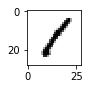

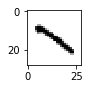

In [434]:
dt0 = datetime.now()
for x in range(0, 100):
    im2 = np.copy(im)
    for i in xrange(0, 28):
        for j in xrange(0, 28):
            im2[j, 27-i] = im[i, j]
dt1 = datetime.now() - dt0
print("Took avg of " + str(dt1.total_seconds()*10) + " ms")
plt.imshow(255 - im, cmap="gray")
plt.show()
plt.imshow(255 - im2, cmap="gray")
plt.show()

Took avg of 0.0244 ms


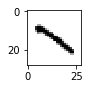

In [435]:
dt0 = datetime.now()
for i in xrange(0, 100):
    im2 = np.rot90(im, k=3)
dt1 = datetime.now() - dt0
print("Took avg of " + str(dt1.total_seconds()*10) + " ms")
plt.imshow(255 - im2, cmap="gray")

### Ex. 5. Test for matrix symmetry
Skipping the manual method; it would be similar to the above, only reflection.

In [441]:
def is_symmetric(matrix):
    return np.allclose(matrix, matrix.T, atol=1e-8)
A = np.array([[1,3],[3,1]])
print(A)
print(is_symmetric(A))
B = np.array([[1,4],[3,1]])
print(B)
print(is_symmetric(B))

[[1 3]
 [3 1]]
True
[[1 4]
 [3 1]]
False


### Ex. 6. Generate and plot dataset

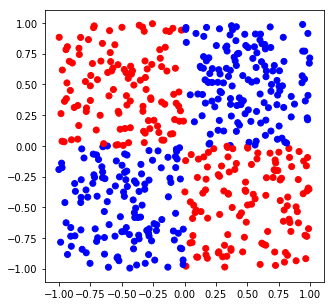

In [458]:
datax = np.random.uniform(low=-1, high=1, size=500)
datay = np.random.uniform(low=-1, high=1, size=500)
col = np.array(["b"] * 500)
for i in xrange(0, 500):
    if datax[i] < 0 and datay[i] > 0:
        col[i] = "r"
    if datax[i] > 0 and datay[i] < 0:
        col[i] = "r"
plt.rcParams['figure.figsize'] = [5,5]
plt.scatter(datax, datay, c=col)

### Ex. 7. Generate and plot dataset
Concentric circles

In [ ]:
r = np.random.randn()